<a href="https://colab.research.google.com/github/ubinix-warun/mad-bootcamp-2024/blob/main/colab/MAD_week1_3_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***This notebook is a part of chapter 3.5***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt
import altair as alt
from sklearn.datasets import load_iris,load_wine,load_iris

#0. Load data

In [ ]:
iris = load_iris()
df_iris = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df_iris['target'] = iris['target']
mapper_iris_target = {0:'setosa',1:'vesicolor',2:'virginica'}
df_iris['target_name'] = df_iris['target'].map(mapper_iris_target)

In [ ]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


#1. Univariate visualization

In [ ]:
df_iris_uni = df_iris['sepal length (cm)']

In [ ]:
df_iris_uni

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

##1.1 Box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7c68516bf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7c68517130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7c68516950>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7c68517670>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7c68517910>],
 'means': []}

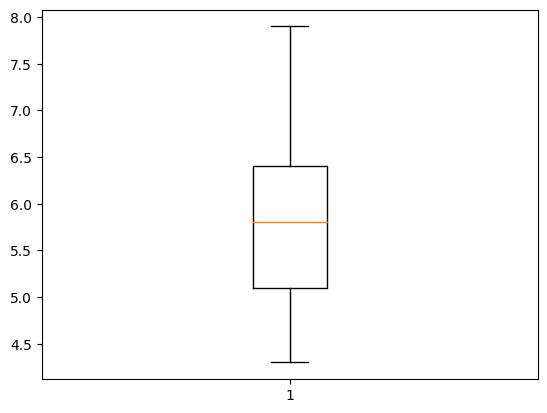

In [ ]:
#matplotlib
plt.boxplot(df_iris_uni)

<Axes: ylabel='sepal length (cm)'>

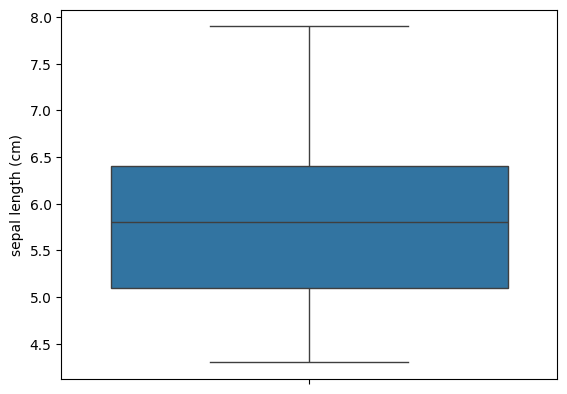

In [ ]:
#seaborn
sns.boxplot(df_iris_uni)

In [ ]:
#altair
boxplot = alt.Chart(df_iris_uni.to_frame()).mark_boxplot().encode(
    alt.Y("sepal length (cm):Q")
)
boxplot

alt.Chart(...)

##1.2 Histogram plot

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

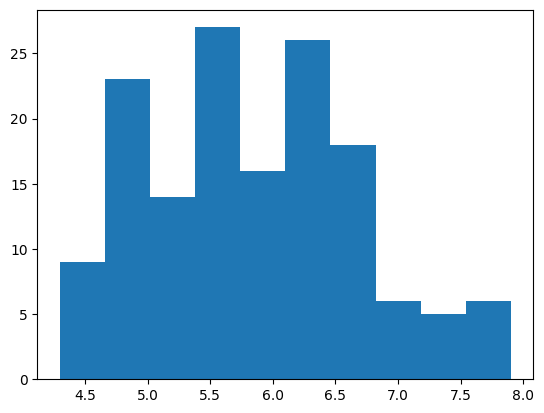

In [ ]:
plt.hist(df_iris_uni)

Text(0, 0.5, 'count')

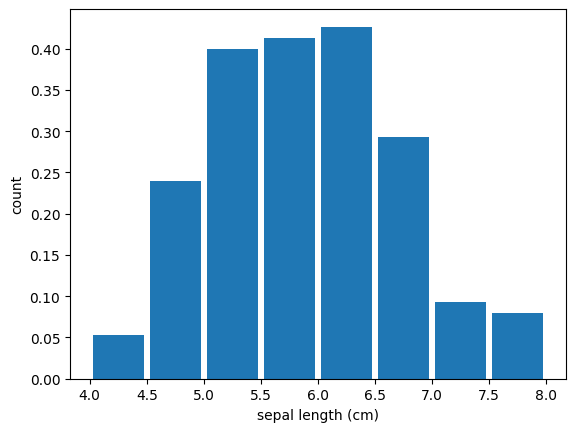

In [ ]:
# matplotlib
# plt.figure(figsize=(7,7))
plt.hist(df_iris_uni,bins=[4,4.5,5,5.5,6,6.5,7,7.5,8],density=True,rwidth=0.9)
plt.xlabel('sepal length (cm)')
plt.ylabel('count')

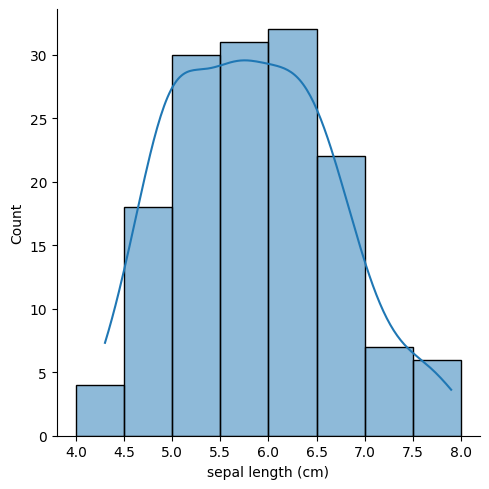

In [ ]:
# seaborn
sns.displot(df_iris_uni,bins=[4,4.5,5,5.5,6,6.5,7,7.5,8],kde=True)

In [ ]:
# altair
barchart = alt.Chart(pd.DataFrame(df_iris_uni)).mark_bar().encode(
    alt.X("sepal length (cm):Q",bin=alt.Bin(maxbins=10)),
    alt.Y('count():Q', stack=None)
)
barchart

alt.Chart(...)

In [ ]:
barchart.interactive()

alt.Chart(...)

# 2. Bivariate visualization

##2.1 nominal & nominal


### Heatmap

In [ ]:
df_titanic = sns.load_dataset("titanic")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df_titanic_nom_nom = df_titanic.loc[:,['class','embark_town']]
df_titanic_nom_nom_pivot = (df_titanic_nom_nom
                            .value_counts()
                            .to_frame('count')
                            .pivot_table(index='class',columns='embark_town',values='count'))
df_titanic_nom_nom_pivot

embark_town,Cherbourg,Queenstown,Southampton
class,,,
First,85,2,127
Second,17,3,164
Third,66,72,353


In [ ]:
df_titanic_nom_nom_pivot_pct = df_titanic_nom_nom_pivot.divide(df_titanic_nom_nom_pivot.sum(axis='rows'),axis='columns')
df_titanic_nom_nom_pivot_pct

embark_town,Cherbourg,Queenstown,Southampton
class,,,
First,0.505952,0.025974,0.197205
Second,0.101190,0.038961,0.254658
Third,0.392857,0.935065,0.548137


Text(0.5, 1.0, 'Percent count of customer for each embark_town')

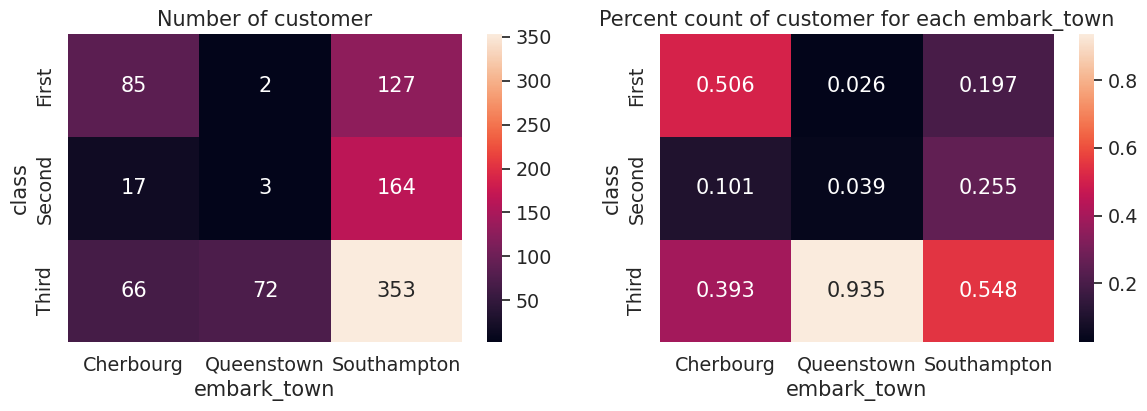

In [ ]:
# seaborn
sns.set(font_scale=1.25)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,4))

sns.heatmap(df_titanic_nom_nom_pivot, annot=True, fmt=".0f",ax=ax1)
sns.heatmap(df_titanic_nom_nom_pivot_pct, annot=True, fmt=".03f",ax=ax2)

ax1.set_title("Number of customer",fontsize=15)
ax2.set_title("Percent count of customer for each embark_town",fontsize=15)

In [ ]:
# If we use altair to create heatmap, we must unstack data like this.
df_titanic_nom_nom_pivot.unstack().to_frame('count').reset_index()

,embark_town,class,count
0,Cherbourg,First,85
1,Cherbourg,Second,17
2,Cherbourg,Third,66
3,Queenstown,First,2
4,Queenstown,Second,3
5,Queenstown,Third,72
6,Southampton,First,127
7,Southampton,Second,164
8,Southampton,Third,353


In [ ]:
# altair
df_titanic_nom_nom_unstack = df_titanic_nom_nom_pivot.unstack().to_frame('count').reset_index()

heatmap = alt.Chart(df_titanic_nom_nom_unstack).mark_rect().encode(
    x='embark_town:N',
    y='class:N',
    color='count:Q'
)

number = alt.Chart(df_titanic_nom_nom_unstack).mark_text(fontSize=20).encode(
    x='embark_town:N',
    y='class:N',
    text='count:Q',
    color=alt.condition(
        alt.datum.count > 300,
        alt.value('white'),
        alt.value('black')
    )
)
(heatmap+number).properties(
    width=200,
    height=150
)

alt.LayerChart(...)

##2.2 nominal & quantitative




In [ ]:
df_titanic_nom_quan = df_titanic.loc[:,['class','fare']]
df_titanic_nom_quan

,class,fare
0,Third,7.2500
1,First,71.2833
2,Third,7.9250
3,First,53.1000
4,Third,8.0500
...,...,...
886,Second,13.0000
887,First,30.0000
888,Third,23.4500
889,First,30.0000


### Barplot

In [ ]:
# barplot
df_titanic_nom_quan_bar = df_titanic_nom_quan.groupby('class')[['fare']].mean().reset_index()
df_titanic_nom_quan_bar = df_titanic_nom_quan_bar.rename(columns={'fare':'mean_fare'})
df_titanic_nom_quan_bar

,class,mean_fare
0,First,84.154687
1,Second,20.662183
2,Third,13.675550


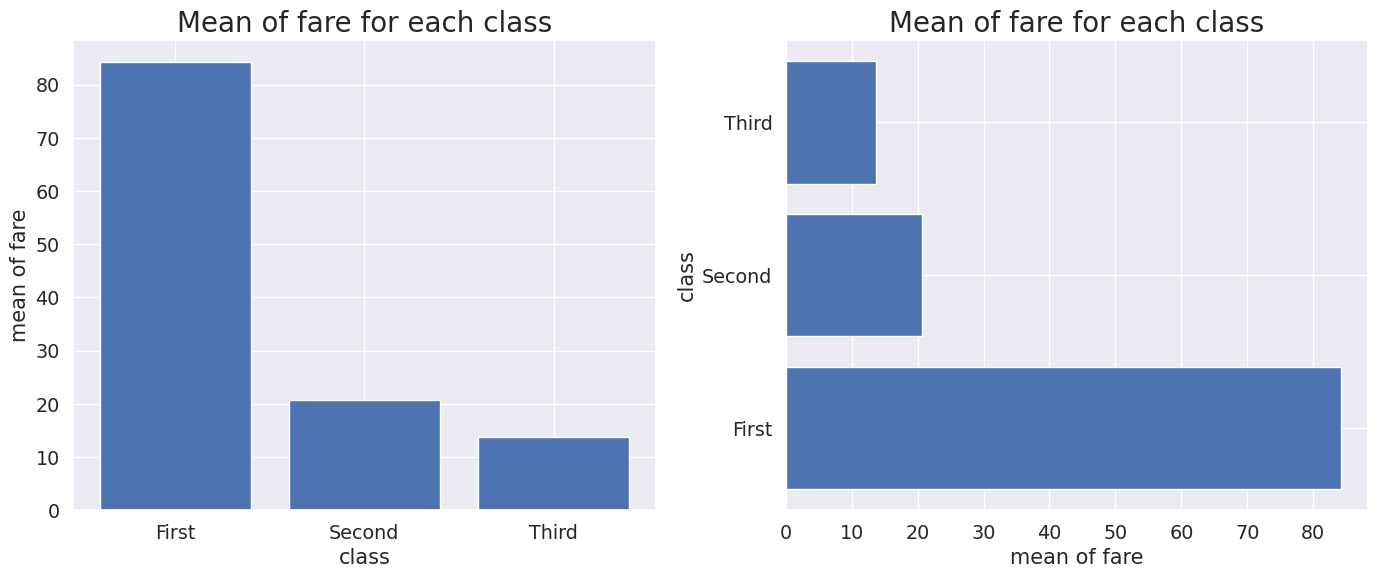

In [ ]:
sns.set(font_scale=1.25)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

ax1.bar(x='class',height='mean_fare',data=df_titanic_nom_quan_bar)
ax1.set_xlabel('class')
ax1.set_ylabel('mean of fare')
ax1.set_title('Mean of fare for each class',fontsize=20)

ax2.barh(y='class',width='mean_fare',data=df_titanic_nom_quan_bar)
ax2.set_xlabel('mean of fare')
ax2.set_ylabel('class')
ax2.set_title('Mean of fare for each class',fontsize=20)

fig.tight_layout(pad=1.0)


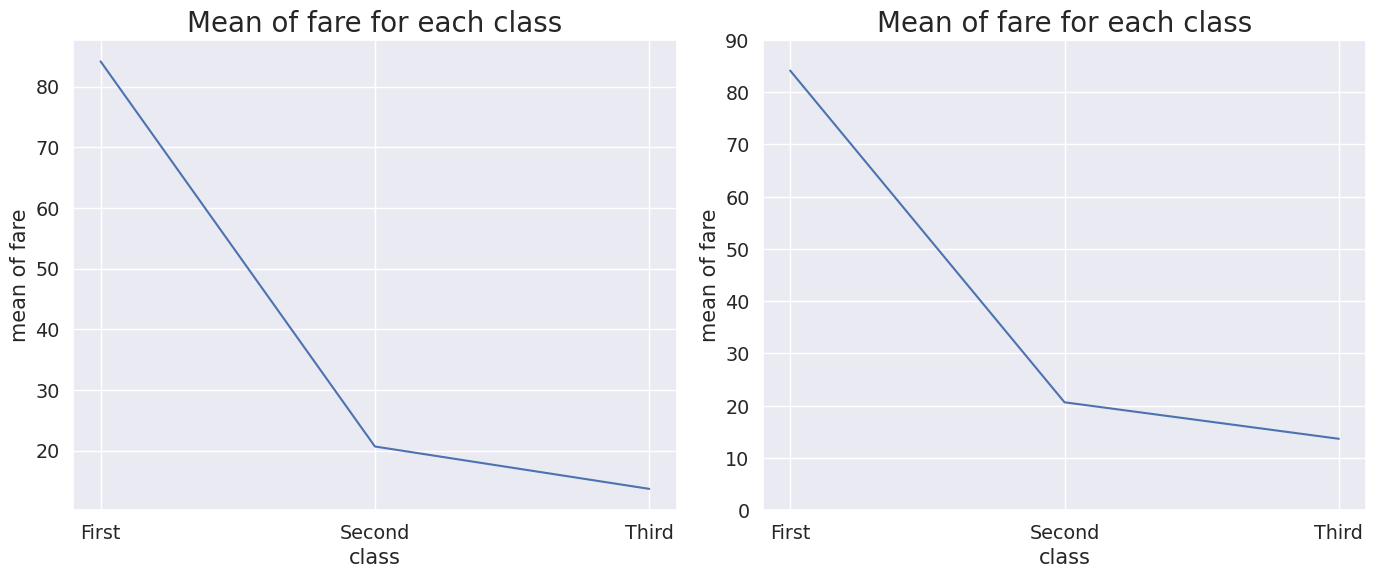

In [ ]:
sns.set(font_scale=1.25)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

ax1.plot(['First', 'Second', 'Third'],df_titanic_nom_quan_bar['mean_fare'])
ax1.set_xlabel('class')
ax1.set_ylabel('mean of fare')
ax1.set_title('Mean of fare for each class',fontsize=20)

# adjusted y axis
ax2.plot(['First', 'Second', 'Third'],df_titanic_nom_quan_bar['mean_fare'])
ax2.set_ylim(0,90)
ax2.set_xlabel('class')
ax2.set_ylabel('mean of fare')
ax2.set_title('Mean of fare for each class',fontsize=20)

fig.tight_layout(pad=1.0)


### About distribution plot

<Axes: xlabel='fare', ylabel='Density'>

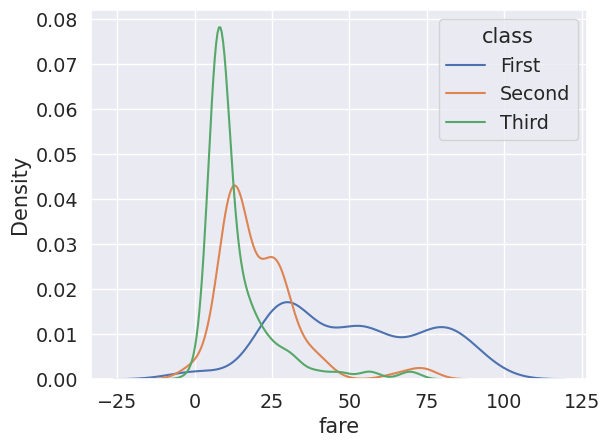

In [ ]:
# distplot with multiple distribution
sns.kdeplot(x='fare',hue='class',data=df_titanic_nom_quan[df_titanic_nom_quan['class']=='First'].query('fare<100'))
sns.kdeplot(x='fare',hue='class',data=df_titanic_nom_quan[df_titanic_nom_quan['class']=='Second'].query('fare<100'))
sns.kdeplot(x='fare',hue='class',data=df_titanic_nom_quan[df_titanic_nom_quan['class']=='Third'].query('fare<100'))

<Axes: xlabel='class', ylabel='fare'>

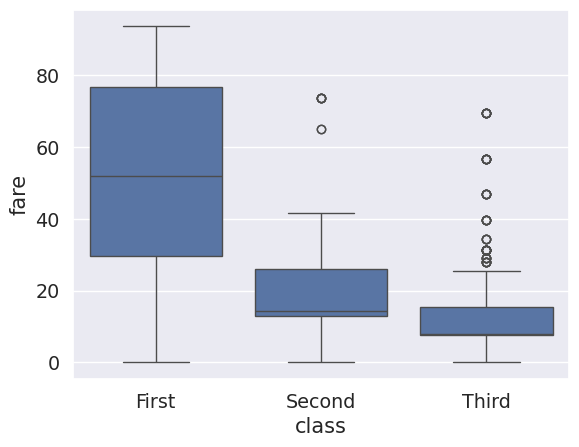

In [ ]:
# Boxplot
sns.boxplot(x='class',y='fare',data=df_titanic_nom_quan.query('fare<100'))

In [ ]:
print('titanic dataframe')
display(df_titanic.head())
print('')
print('')
print('iris dataframe')
display(df_iris.head())

titanic dataframe


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True




iris dataframe


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


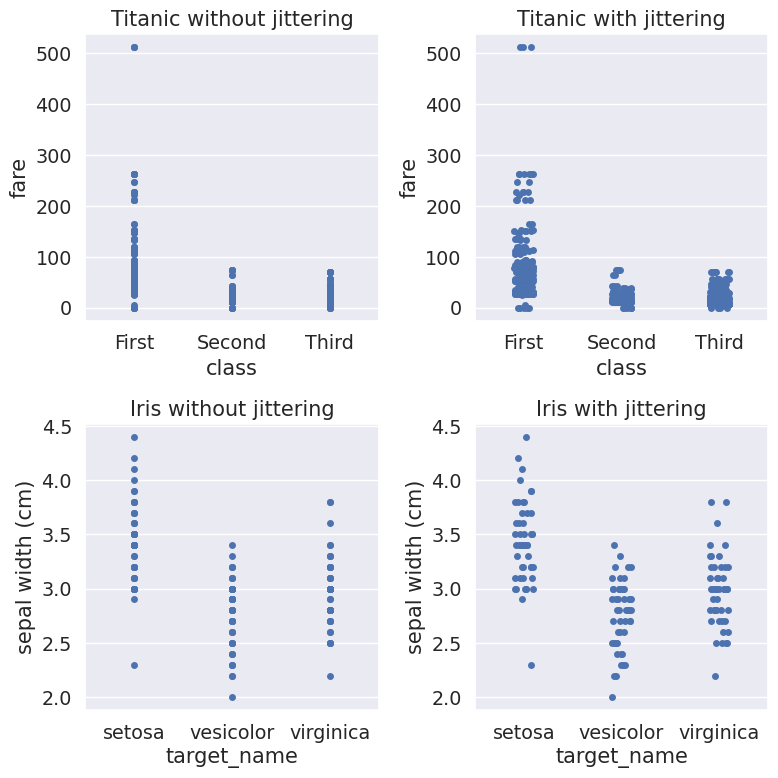

In [ ]:
# Stripplot
sns.set(font_scale=1.25)
fig,([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2,figsize=(8,8))

sns.stripplot(x='class', y='fare', data=df_titanic_nom_quan,jitter=False,ax=ax1)
sns.stripplot(x='class', y='fare', data=df_titanic_nom_quan,jitter=True,ax=ax2)

sns.stripplot(x='target_name', y='sepal width (cm)', data=df_iris,jitter=False,ax=ax3)
sns.stripplot(x='target_name', y='sepal width (cm)', data=df_iris,jitter=True,ax=ax4)


ax1.set_title("Titanic without jittering",fontsize=15)
ax2.set_title("Titanic with jittering",fontsize=15)

ax3.set_title("Iris without jittering",fontsize=15)
ax4.set_title("Iris with jittering",fontsize=15)

fig.tight_layout(pad=1.0)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 78.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 30.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 63.0% of the points cannot be plac

Text(0.5, 1.0, 'Iris dataset')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 81.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


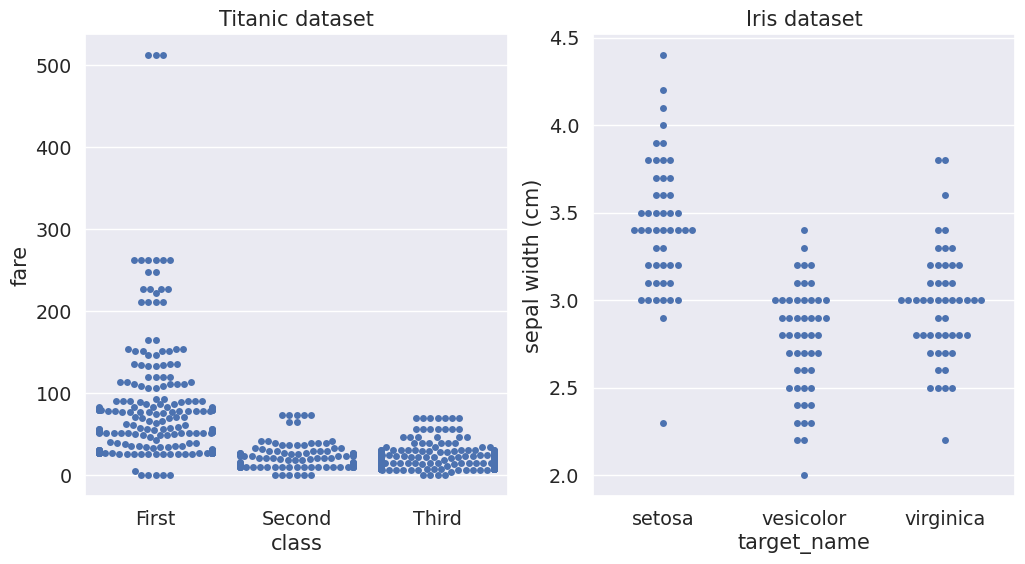

In [ ]:
# Swarmplot
sns.set(font_scale=1.25)
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
sns.swarmplot(x='class', y='fare', data=df_titanic_nom_quan,ax=ax1)
# sns.stripplot(x='target_name', y='sepal width (cm)', data=df_iris,jitter=True,ax=ax2)
sns.swarmplot(x='target_name', y='sepal width (cm)', data=df_iris,ax=ax2)

ax1.set_title("Titanic dataset",fontsize=15)
ax2.set_title("Iris dataset",fontsize=15)


##2.3 quantitative & quantitative

###Scatter plot

In [ ]:
df_iris.loc[:,['sepal length (cm)','sepal width (cm)']]

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


Text(0, 0.5, 'sepal width')

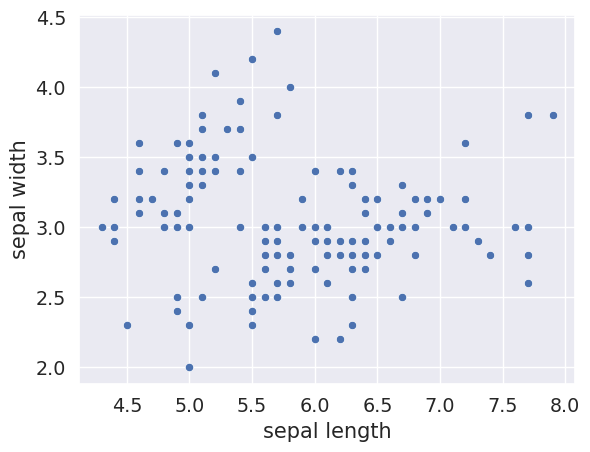

In [ ]:
# seaborn
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',data=df_iris)
plt.xlabel('sepal length')
plt.ylabel('sepal width')

In [ ]:
# altair
scatter = alt.Chart(df_iris).mark_point().encode(
    x='sepal length (cm)',
    y='sepal width (cm)',
)
scatter.properties(
    width=400,
    height=400
).interactive()

alt.Chart(...)

#Multivariate data visualization

##3.1 Scatter plot

Text(0, 0.5, 'sepal width')

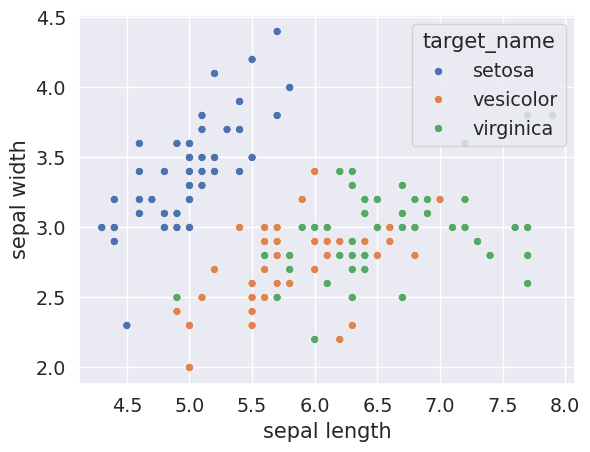

In [ ]:
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',hue='target_name',data=df_iris)
plt.xlabel('sepal length')
plt.ylabel('sepal width')

In [ ]:
# altair
scatter = alt.Chart(df_iris).mark_point().encode(
    x='sepal length (cm)',
    y='sepal width (cm)',
    color = 'target_name',
)
scatter.properties(
    width=400,
    height=400
)

alt.Chart(...)

In [ ]:
# CAR DATASET

# https://www.datacamp.com/community/tutorials/categorical-data
# df_flights = pd.read_csv('https://raw.githubusercontent.com/ismayc/pnwflights14/master/data/flights.csv')

# https://pbpython.com/categorical-encoding.html
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]
df_cars = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )

In [ ]:
df_cars_tmp = df_cars[df_cars['make'].isin(['isuzu','toyota','honda','volvo'])]

In [ ]:
df_cars_tmp.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
30,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479.0
31,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,31,38,6855.0
32,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,79,1bbl,2.91,3.07,10.1,60.0,5500.0,38,42,5399.0
33,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,6529.0
34,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,7129.0


<Axes: xlabel='horsepower', ylabel='wheel_base'>

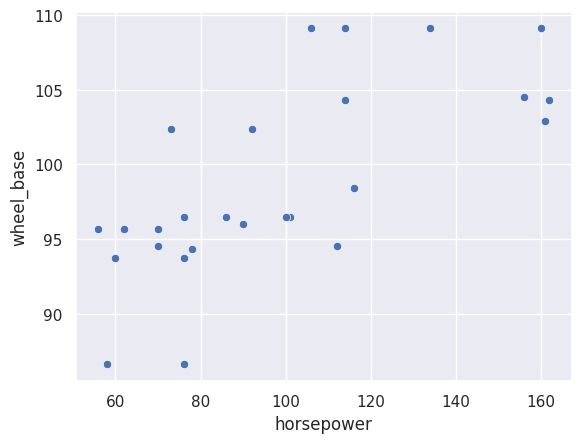

In [ ]:
sns.set(font_scale=1)
sns.scatterplot(x=df_cars_tmp['horsepower'],
                y=df_cars_tmp['wheel_base'],
                legend=False)

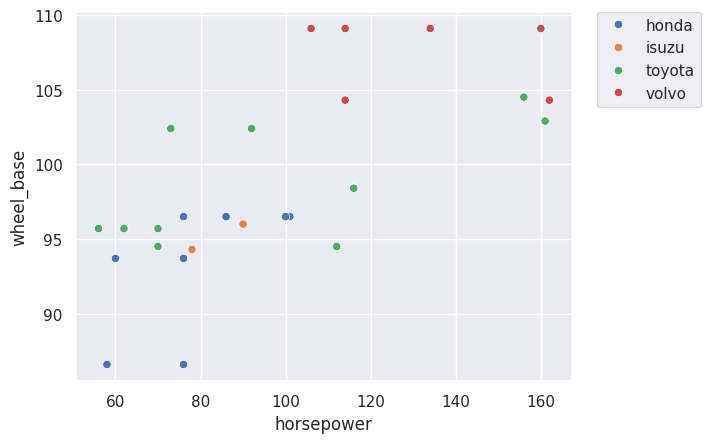

In [ ]:
sns.set(font_scale=1)
sns.scatterplot(x=df_cars_tmp['horsepower'],
                y=df_cars_tmp['wheel_base'],
                hue=df_cars_tmp['make']
                )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

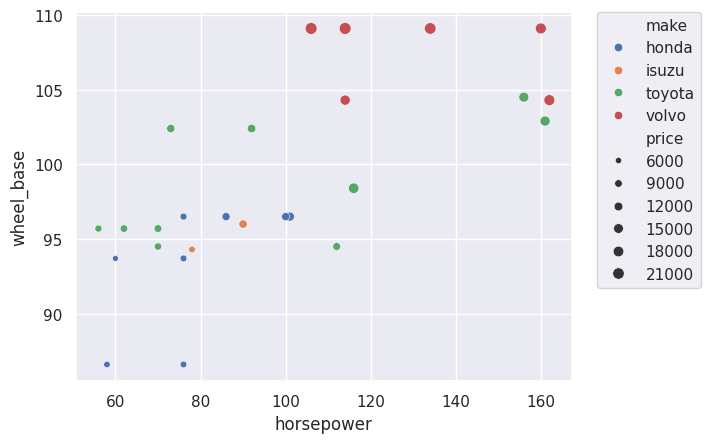

In [ ]:
sns.set(font_scale=1)
sns.scatterplot(x=df_cars_tmp['horsepower'],
                y=df_cars_tmp['wheel_base'],
                hue=df_cars_tmp['make'],
                size = df_cars_tmp['price']
                )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


Text(0.5, 1.0, '4 dimensions')

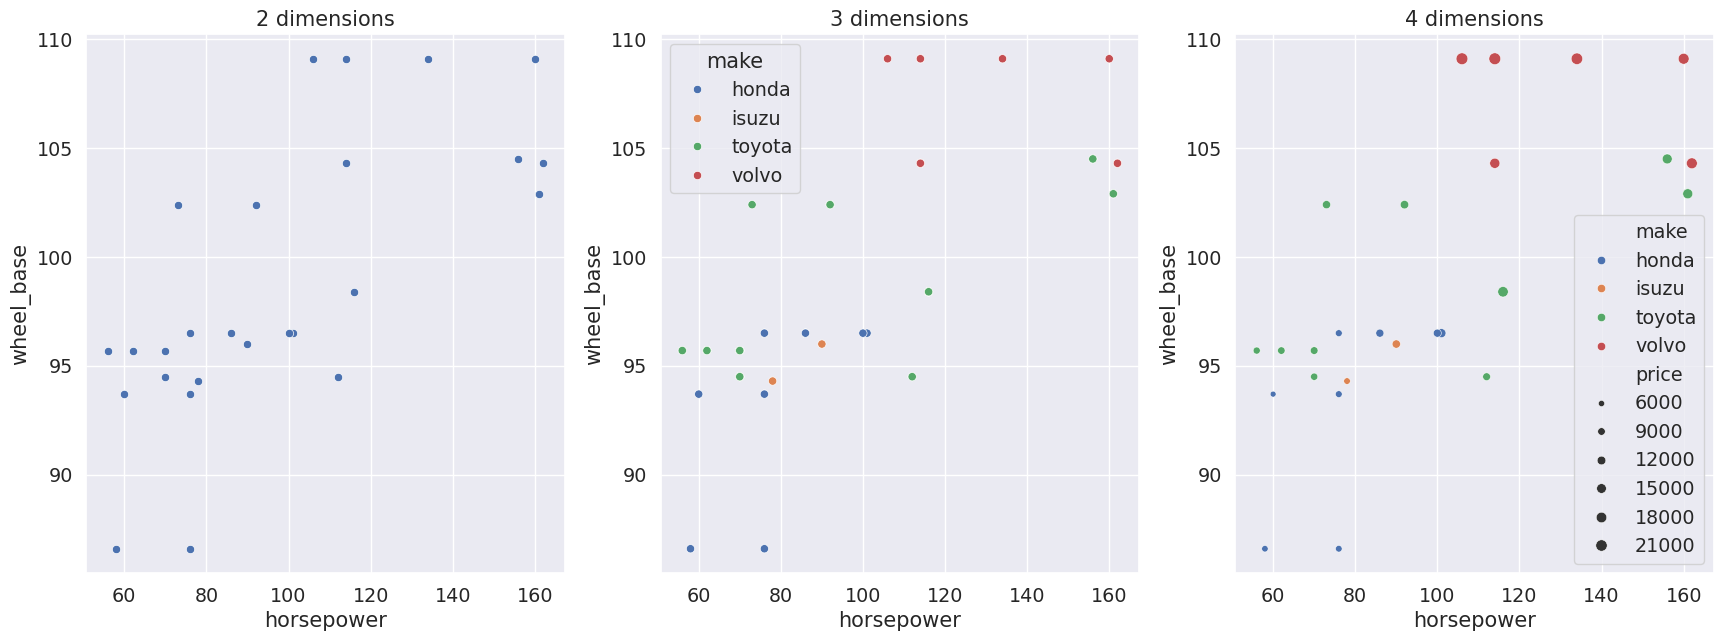

In [ ]:
sns.set(font_scale=1.25)
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(21,7))

sns.scatterplot(x=df_cars_tmp['horsepower'],
                y=df_cars_tmp['wheel_base'],
                # legend=False,
                ax=ax1)
sns.scatterplot(x=df_cars_tmp['horsepower'],
                y=df_cars_tmp['wheel_base'],
                hue=df_cars_tmp['make'],
                # legend=False,
                ax=ax2
               )
ax3=sns.scatterplot(x=df_cars_tmp['horsepower'],
                y=df_cars_tmp['wheel_base'],
                hue=df_cars_tmp['make'],
                size = df_cars_tmp['price'],
                # legend=False,
                ax=ax3
               )


ax1.set_title('2 dimensions')
ax2.set_title('3 dimensions')
ax3.set_title('4 dimensions')

In [ ]:
# altair
scatter = alt.Chart(df_cars_tmp).mark_point().encode(
    x='horsepower',
    y='wheel_base',
    color = 'make',
    size = 'price',
    tooltip=['horsepower','wheel_base','fuel_type','num_doors' ,'make', 'price']
)
scatter.properties(
    width=400,
    height=400
).interactive()

alt.Chart(...)

##3.2 Stack&multiple bar chart

In [ ]:
# preprocess
df_titanic_stack_bar = df_titanic.loc[:,['sex','embark_town']].value_counts().to_frame('count').reset_index()
df_titanic_stack_bar = df_titanic_stack_bar.pivot_table(index='embark_town',columns='sex').reset_index()
df_titanic_stack_bar.columns = ['embark_town','count_male','count_female']
df_titanic_stack_bar

,embark_town,count_male,count_female
0,Cherbourg,73,95
1,Queenstown,36,41
2,Southampton,203,441


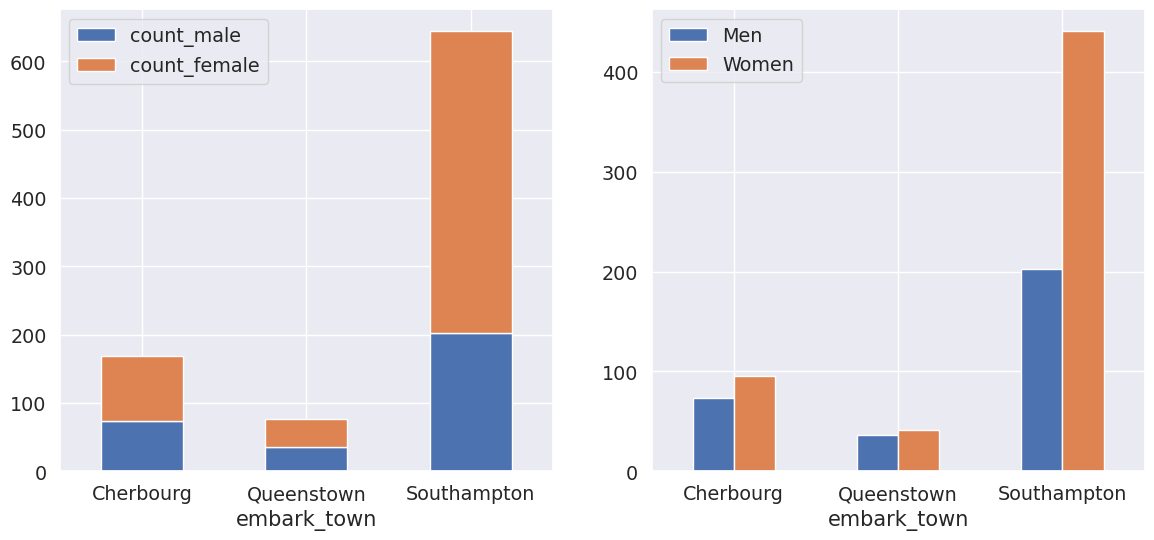

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

df_titanic_stack_bar.set_index('embark_town').plot.bar(stacked=True,rot=0,ax=ax1)
plt.legend(['Men','Women'])

df_titanic_stack_bar.set_index('embark_town').plot.bar(rot=0,ax=ax2)
plt.legend(['Men','Women'])

In [ ]:
# altair
stack_bar_chart = alt.Chart(df_titanic).mark_bar().encode(
    x='embark_town',
    y='count(*):Q',
    color='sex:N'
).properties(
    width=400,
    height=400
)

multiple_bar_chart = alt.Chart(df_titanic).mark_bar().encode(
    x=alt.X('sex:O',axis=alt.Axis(title=None, labels=False)),
    y='count(*):Q',
    color='sex:N',
    column=alt.Column('embark_town:N',header=alt.Header(titleOrient='bottom', labelOrient='bottom'))
).properties(
    width=100,
    height=400
)

In [ ]:
(stack_bar_chart|multiple_bar_chart).resolve_scale(y='shared',color='shared')

alt.HConcatChart(...)

##3.3 Small multiple

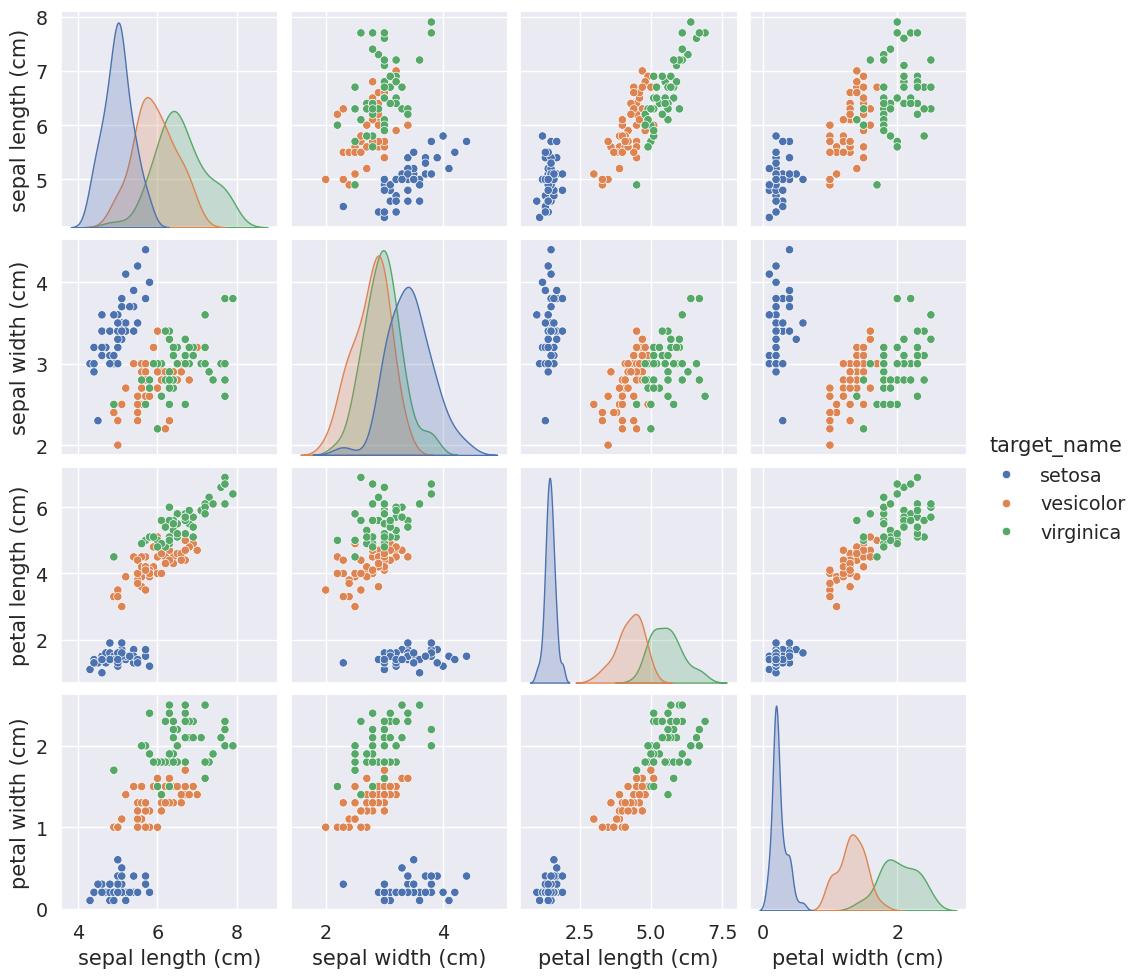

In [ ]:
sns.pairplot(df_iris.drop(columns='target'),hue='target_name')

In [ ]:
# pairplot using altair
alt.Chart(df_iris).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='target_name:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)'],
    column=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)'],
)#.interactive()

alt.RepeatChart(...)

# Visual variable separability

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

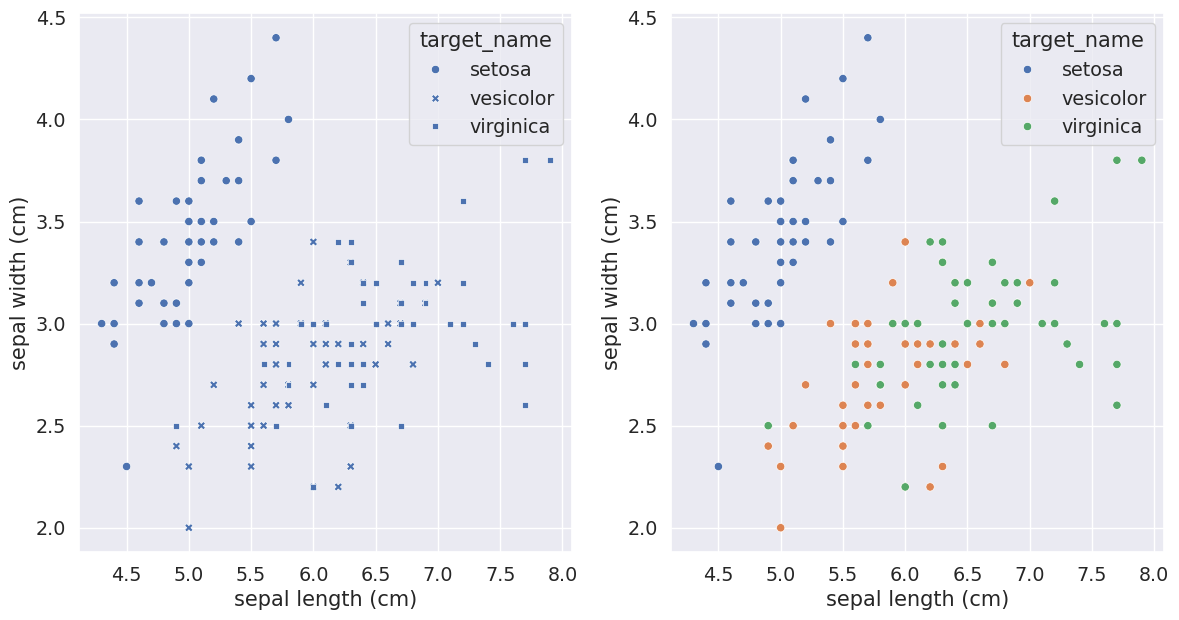

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,7))

sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',style='target_name',data=df_iris, ax=ax1)
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',hue='target_name',data=df_iris, ax=ax2)


Right figure is easier to understand than the left.